In [1]:
# In this practice, we have to find customer churn  ( they come again , or not )

In [3]:
# Firstly i picked neened libraries and methods 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [7]:
url='https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true'

df=pd.read_excel(url, sheet_name='E Comm')
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4692,54693,0,21.0,Mobile Phone,3,21.0,E wallet,Male,3.0,4,Laptop & Accessory,5,Single,4,0,13.0,2.0,2.0,8.0,174.60
4155,54156,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
3998,53999,0,12.0,Mobile Phone,3,9.0,E wallet,Female,4.0,6,Laptop & Accessory,1,Married,4,1,21.0,1.0,2.0,4.0,179.05
2386,52387,0,1.0,Mobile Phone,3,11.0,Credit Card,Male,2.0,3,Laptop & Accessory,5,Single,1,0,18.0,0.0,1.0,3.0,184.63
3207,53208,0,1.0,Mobile Phone,3,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Divorced,2,0,23.0,1.0,2.0,3.0,173.51
3447,53448,0,8.0,Mobile Phone,3,7.0,E wallet,Male,4.0,2,Laptop & Accessory,2,Married,2,0,12.0,2.0,2.0,NaN,222.25
2640,52641,0,14.0,Mobile Phone,3,10.0,E wallet,Female,2.0,3,Fashion,3,Married,1,1,13.0,5.0,13.0,5.0,204.47
96,50097,0,6.0,Phone,1,NaN,CC,Female,2.0,4,Mobile,4,Divorced,7,0,21.0,0.0,1.0,1.0,126.22
3475,53476,0,14.0,Mobile Phone,1,27.0,Cash on Delivery,Male,4.0,4,Fashion,2,Divorced,6,0,21.0,5.0,12.0,NaN,228.22
755,50756,0,5.0,Computer,1,19.0,UPI,Female,NaN,4,Mobile,4,Divorced,2,0,20.0,0.0,2.0,2.0,127.43


In [9]:
pd.read_excel(url, sheet_name='Data Dict', header=1, usecols=[1,2,3])

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [19]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

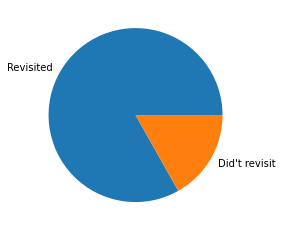

In [86]:
diff=df['Churn'].value_counts()/len(df)*100
plt.pie(diff, labels=['Revisited', "Did't revisit"])
plt.show()

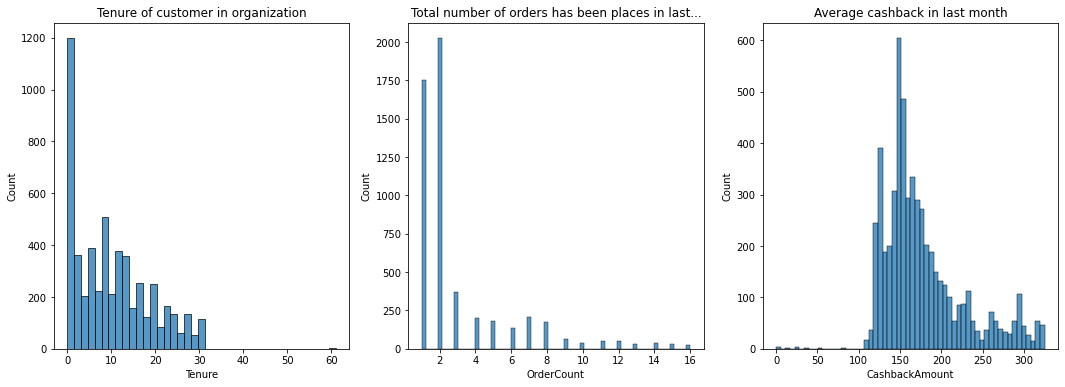

In [87]:
fig, axes= plt.subplots(1,3, figsize=(18,6))

sns.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title("Tenure of customer in organization")

sns.histplot(x='OrderCount', data=df, ax=axes[1])
axes[1].set_title("Total number of orders has been places in last...")

sns.histplot(x='CashbackAmount', data=df, ax=axes[2])
axes[2].set_title("Average cashback in last month")

plt.show()

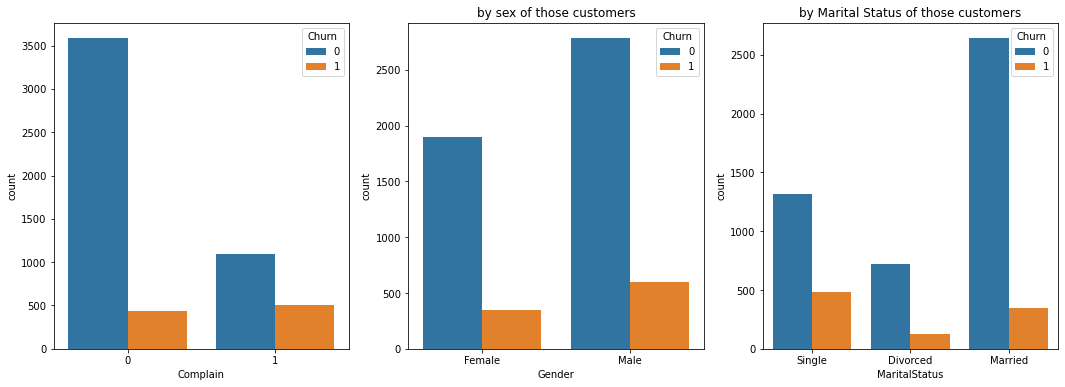

In [88]:
fig, axes=plt.subplots(1,3, figsize=(18,6))

sns.countplot(x='Complain',hue='Churn', data=df, ax=axes[0])

sns.countplot(x='Gender',hue='Churn' ,data=df, ax=axes[1])
axes[1].set_title("by sex of those customers")

sns.countplot(x='MaritalStatus',hue='Churn', data=df, ax=axes[2])
axes[2].set_title("by Marital Status of those customers")

plt.show()


In [34]:
print(f"Amount of Nan values %: {np.round(df.isnull().sum().sum()/len(df)*100)}%")
nan_rows=df[df.isnull().any(axis=1)].shape[0]
print(f"Amount of rows which consist of Nan values: {nan_rows}")

Amount of Nan values %: 33.0%
Amount of rows which consist of Nan values: 1856


In [ ]:
# I guess 33 % nan value is a bit more to work with, that is why I dicided to pick high correlated columns 
# the point is to reduce nan value rows, if it is less enough, we can deal with them easily

In [35]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [36]:
data=df[['Churn', 'Tenure','Complain','DaySinceLastOrder','CashbackAmount','Gender', 'MaritalStatus']]

In [37]:
# Retrying to check for Nan values
print(f"Amount of Nan values %: {np.round(data.isnull().sum().sum()/len(data)*100)}%")
nan_rows=data[data.isnull().any(axis=1)].shape[0]
print(f"Amount of rows which consist of Nan values: {nan_rows}")

Amount of Nan values %: 10.0%
Amount of rows which consist of Nan values: 571


In [39]:
# This would be enough to pass those nan values as there is more data to deal with
data.dropna(inplace=True)

In [41]:
data.shape

(5059, 7)

In [42]:
# Preparing for Machine Learning

In [54]:
encoded=pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,1,5.0,159.93,1,0,0,0,1
3,1,0.0,0,3.0,134.07,0,1,0,0,1
4,1,0.0,0,3.0,129.60,0,1,0,0,1
5,1,0.0,1,7.0,139.19,1,0,0,0,1
8,1,13.0,1,2.0,126.83,0,1,1,0,0


In [61]:
x=encoded.drop('Churn', axis=1)
y=encoded['Churn']

In [64]:
s_scaler=StandardScaler()
X=s_scaler.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       873
           1       0.67      0.47      0.56       139

    accuracy                           0.90      1012
   macro avg       0.80      0.72      0.75      1012
weighted avg       0.89      0.90      0.89      1012

Accuracy score: 0.8962450592885376


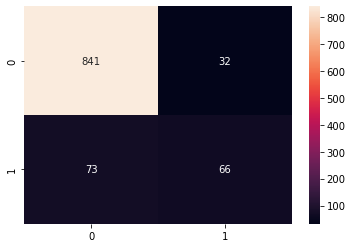

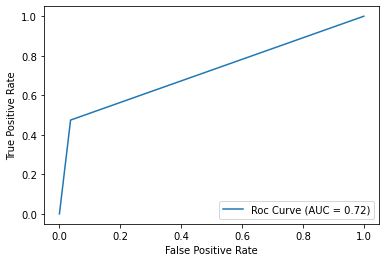

In [67]:
# Logistic Regression

lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred=lr_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))

con_mat=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, threshholds= metrics.roc_curve(y_test, y_pred)
auc_roc=metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_roc, estimator_name='Roc Curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       873
           1       0.78      0.86      0.82       139

    accuracy                           0.95      1012
   macro avg       0.88      0.91      0.89      1012
weighted avg       0.95      0.95      0.95      1012

Accuracy score: 0.9466403162055336


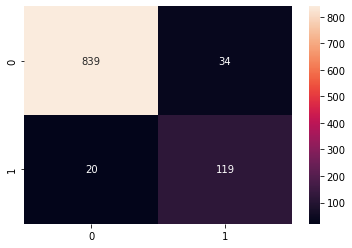

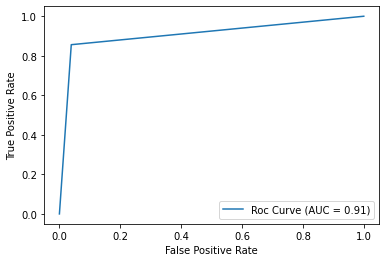

In [75]:
# Decion Tree 

tree_model=DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_predict=tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print("Accuracy score:", metrics.accuracy_score(y_test, y_predict))

con_mat=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(con_mat, annot=True, fmt= 'g')
plt.show()

fpr, tpr, threshholds= metrics.roc_curve(y_test, y_predict)
roc_auc=metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc Curve')
display.plot()

plt.show()

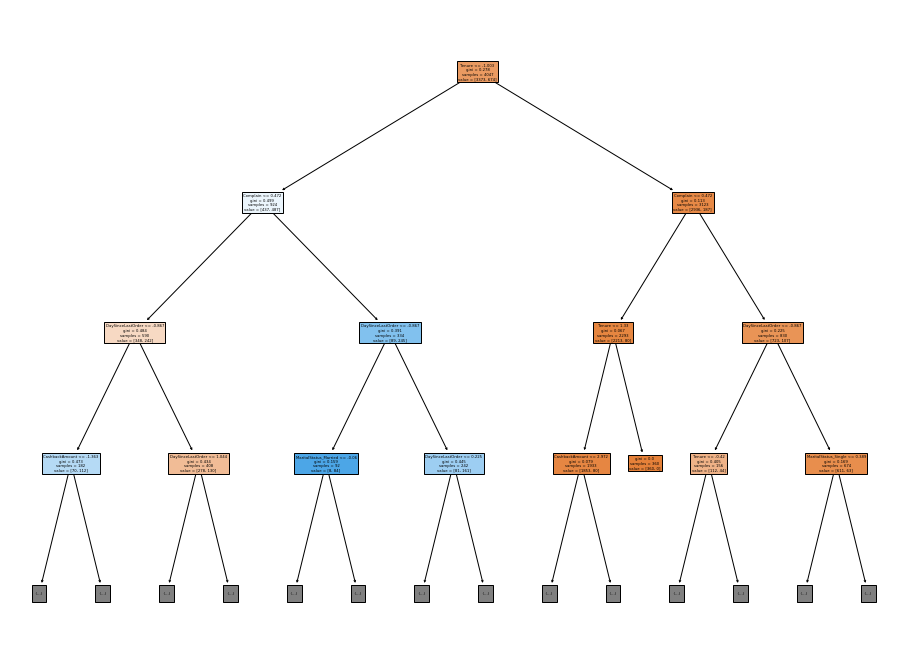

In [85]:
# Drawing tree

cols=encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(16,12))
plot_tree(tree_model,max_depth=3, feature_names=cols, filled=True )
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       873
           1       0.69      0.78      0.73       139

    accuracy                           0.92      1012
   macro avg       0.83      0.86      0.84      1012
weighted avg       0.93      0.92      0.92      1012

Accuracy score: 0.9209486166007905


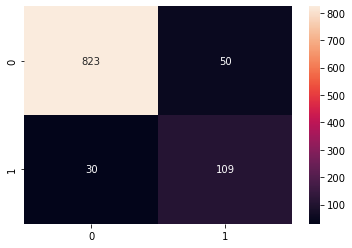

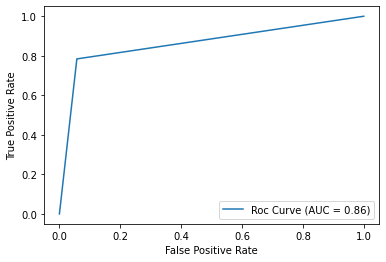

In [80]:
# Random Forest Classifier 

rf_model=RandomForestClassifier(n_estimators=5)
rf_model.fit(x_train, y_train)

y_predict2=rf_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict2))
print("Accuracy score:", metrics.accuracy_score(y_test, y_predict2))

con_mat2=metrics.confusion_matrix(y_test, y_predict2)
sns.heatmap(con_mat2, annot=True, fmt='g')
plt.show()

fpr, tpr, threshholds= metrics.roc_curve(y_test, y_predict2)
roc_auc=metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc Curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       873
           1       0.61      0.37      0.46       139

    accuracy                           0.88      1012
   macro avg       0.76      0.66      0.70      1012
weighted avg       0.86      0.88      0.87      1012

Accuracy score:  0.8804347826086957


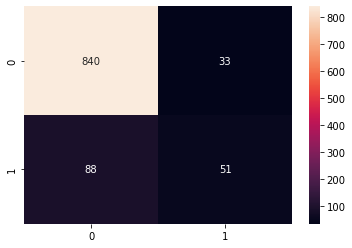

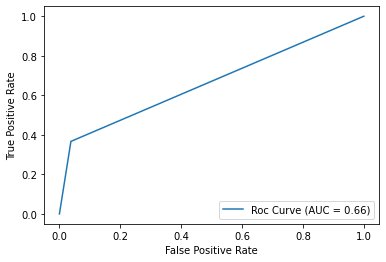

In [81]:
# Support Vector Machine

svm_model=SVC()
svm_model.fit(x_train, y_train)

y_predict3= svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_predict3))
print("Accuracy score: ", metrics.accuracy_score(y_test, y_predict3))

fon_max3=metrics.confusion_matrix(y_test, y_predict3)
sns.heatmap(fon_max3, annot=True, fmt='g')
plt.show()

fpr, tpr, threshholds= metrics.roc_curve(y_test, y_predict3)
auc_roc=metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_roc, estimator_name='Roc Curve')
display.plot()
plt.show()